# **Bank Churn Customer Analysis**: Customer Segmentation

|| **Segmenting Bank Customers and Recommend Potential New Products or Services for each Segment** ||

## **Objective 1: Preparing the Data for Modeling**

Our First Objective is to Prepare the Data for Modeling by Selecting a Subset of Fields, making sure they are Numeric, looking at their Distributions, and Engineering a new feature.

In [2]:
# Importing the Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"I:\Python\Projects\Bank Customer Segmentation\Bank_Churn.csv")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### **Let's keep a subset of the Data**

Create a DataFrame containing all fields except "CustomerId", "Surname" and "Exited".

In [6]:
data_subset = data [['CreditScore', 'Geography', 'Gender',
                     'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

data_subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### **Making Text Fields Numeric**

In [7]:
data_clean = data_subset.copy()
data_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
data_clean.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
data_clean.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
data_clean.Gender = np.where(data_clean.Gender == 'Female', 1, 0)
data_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10


In [11]:
data_clean = pd.get_dummies(data_clean, columns = ['Geography'], dtype = 'int', prefix = '', prefix_sep = '')
data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


### **Exploring the Data**

Exploring the Data by looking at the Min/Max values and the Distribution of each Column.

In [12]:
data_clean.describe().round()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,651.0,0.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,1.0,0.0,0.0
std,97.0,0.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,1.0,0.0,0.0
min,350.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0
25%,584.0,0.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0,0.0,0.0
50%,652.0,0.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,1.0,0.0,0.0
75%,718.0,1.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,1.0,1.0,0.0
max,850.0,1.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0,1.0,1.0


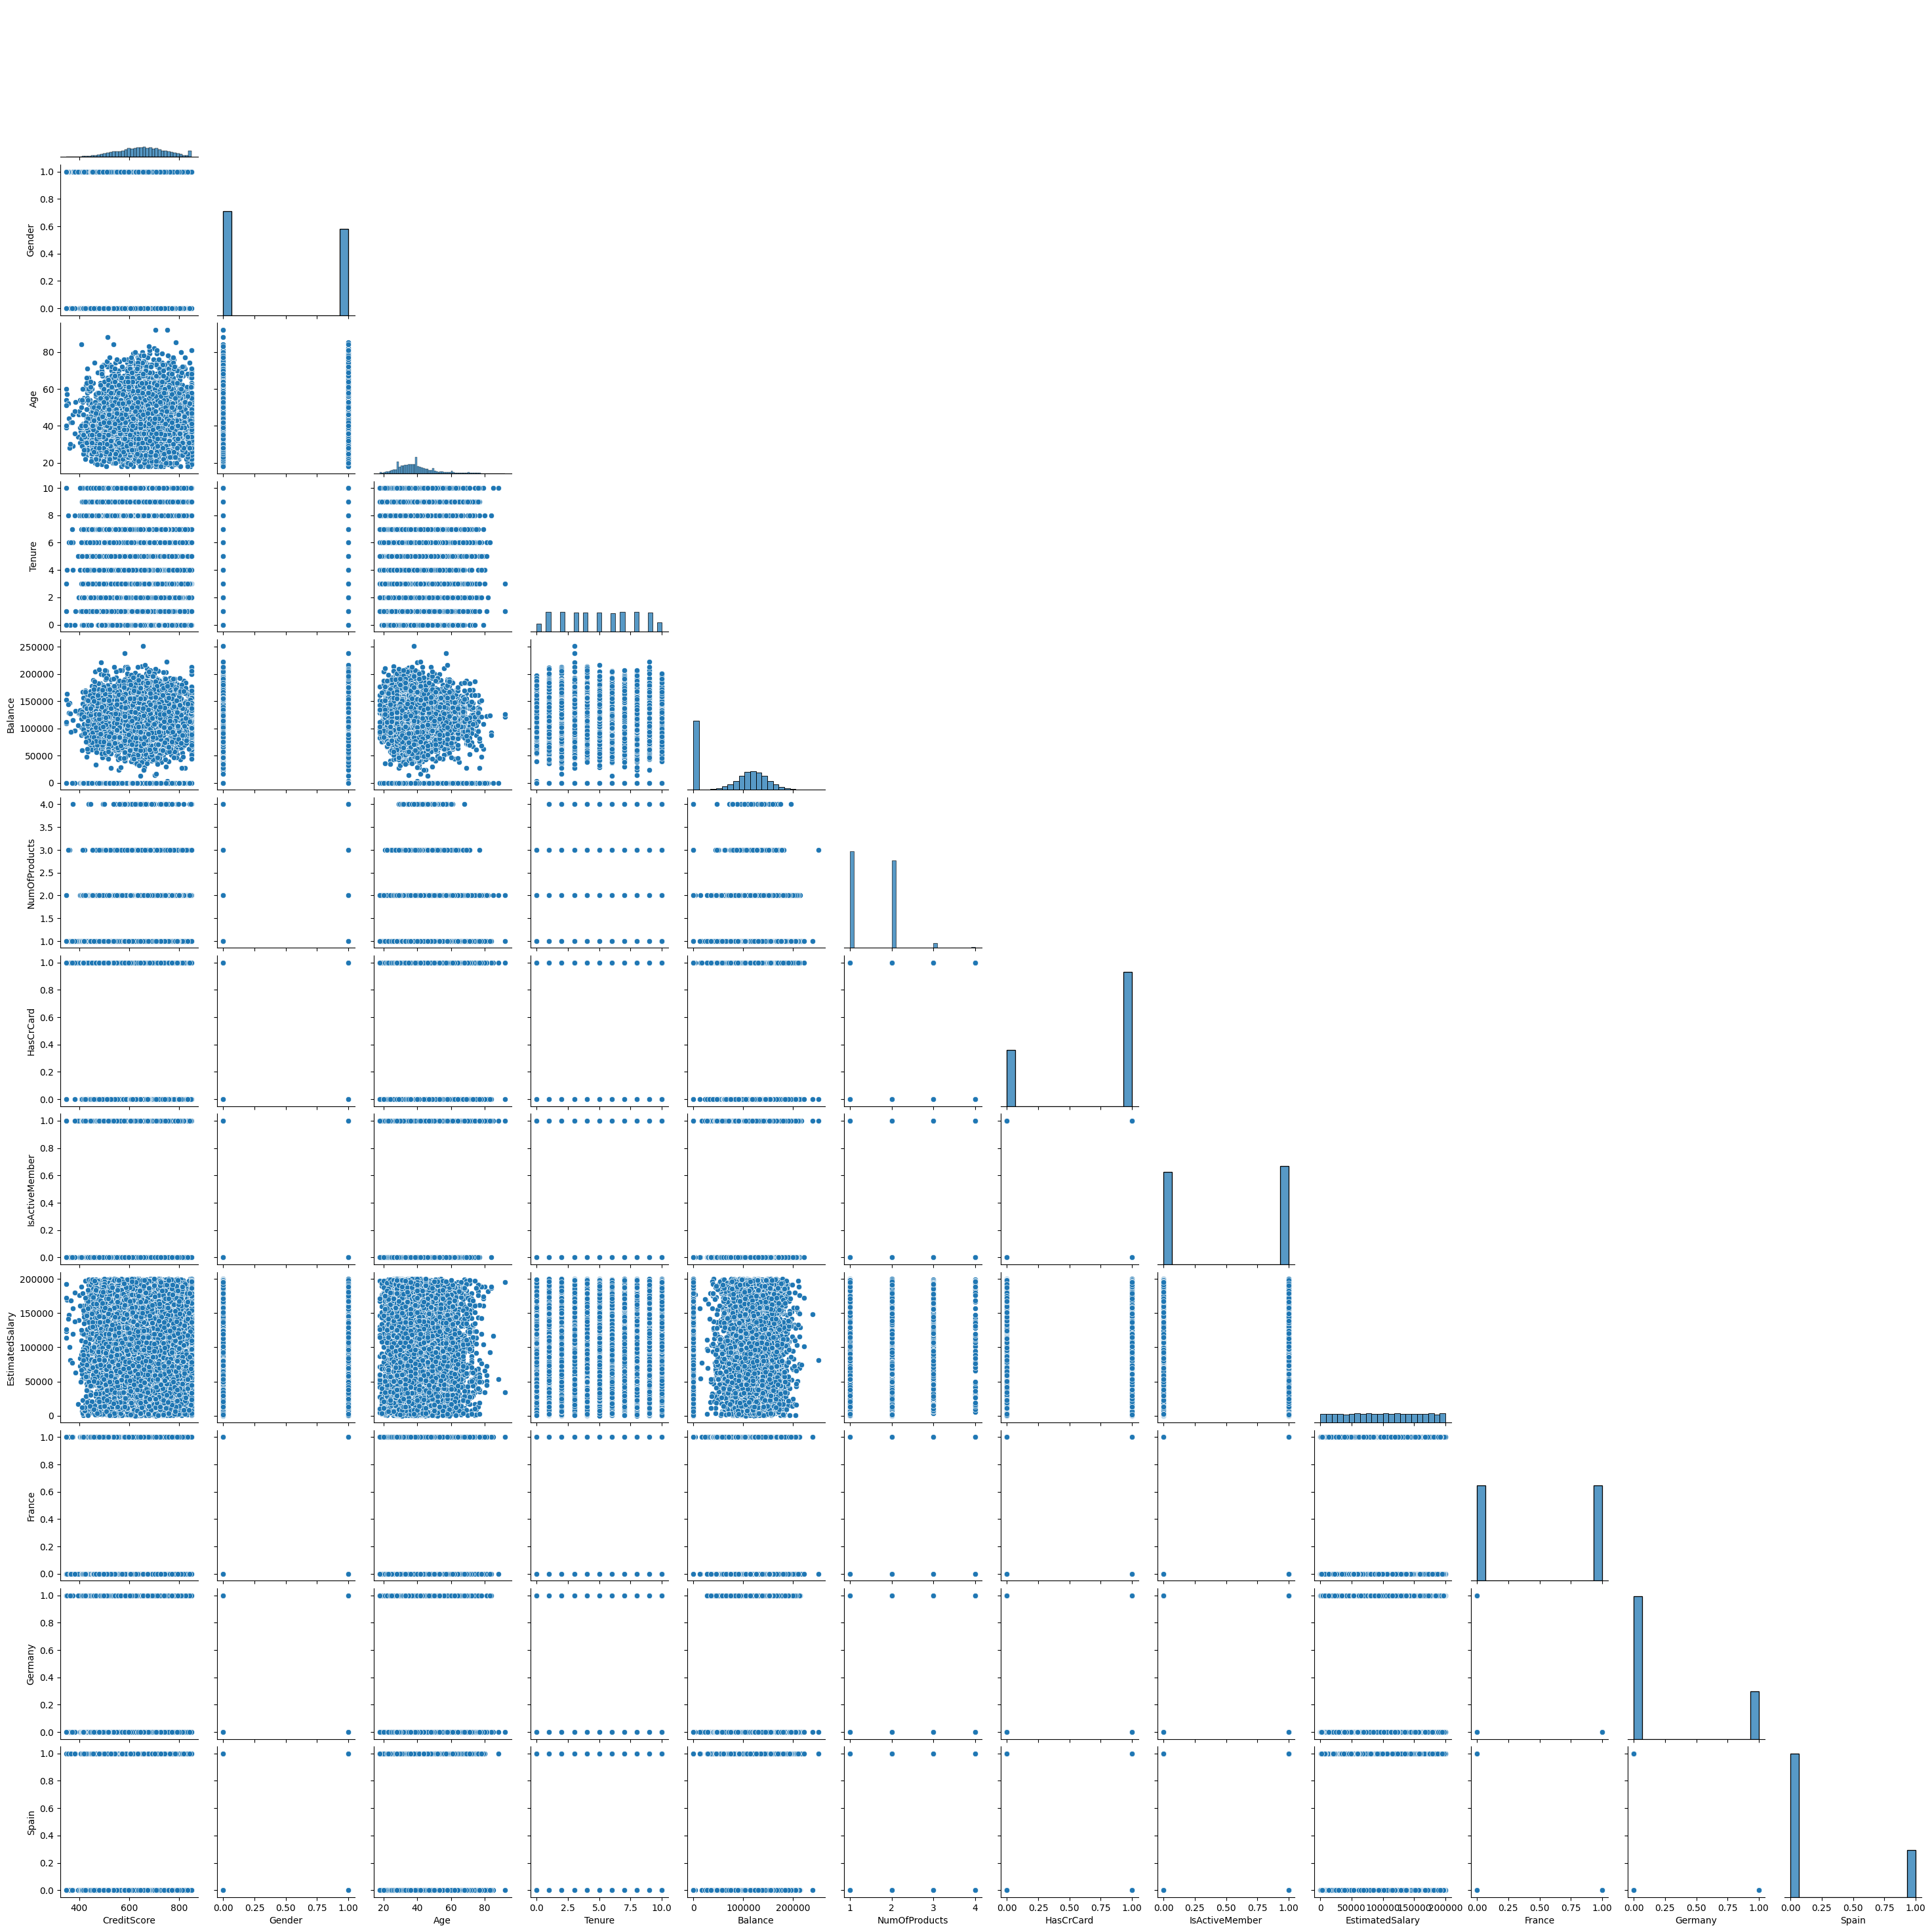

In [13]:
sns.pairplot(data_clean, corner = True);

### **Let's Engineer a New Feature**

Engineer a new feature called "ProductsPerYear".

In [14]:
data_clean['ProductsPerYear'] = np.where(data_clean.Tenure == 0, data_clean.NumOfProducts, data_clean.NumOfProducts / data_clean.Tenure)
data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [15]:
data_clean.describe().round()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,651.0,0.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,1.0,0.0,0.0,1.0
std,97.0,0.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,1.0,0.0,0.0,1.0
min,350.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
25%,584.0,0.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0,0.0,0.0,0.0
50%,652.0,0.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,1.0,0.0,0.0,0.0
75%,718.0,1.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,1.0,1.0,0.0,1.0
max,850.0,1.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0,1.0,1.0,4.0


## **Objective 2: Cluster the Customers (Round 1)**

Our Second Objective is to Segment the Customers using K-Means Clustering, including Standardizing the Data, Creating an Inertia Plot, and Interpreting the Clusters.

### **Scale the Data using Stardardization**

Standardize the data so that each column has a Mean of 0 and Standard Deviation of 1.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns = data_clean.columns)
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,-0.016781


In [17]:
df_scaled.describe().round()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-1.0,-0.0,-0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,-0.0
75%,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-1.0,0.0
max,2.0,1.0,5.0,2.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,7.0


### **Fit K-Means Models with 2-15 Clusters**

Fit K-Means Clustering Models on the Standardized Data with 2-15 Clusters to create an Inertia Plot.

In [19]:
# Import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to hold many Inertia and Silhouette Values
inertia_values = []
silhouette_scores = []

# Creat 2-15 clusters, and add the Intertia Scores and Silhouette Scores to the Lists

for k in range(2, 16):
  kmeans = KMeans(n_clusters = k, n_init= 10, random_state = 42) #changed from auto to 10
  kmeans.fit(df_scaled)
  inertia_values.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric= 'euclidean', sample_size= None))

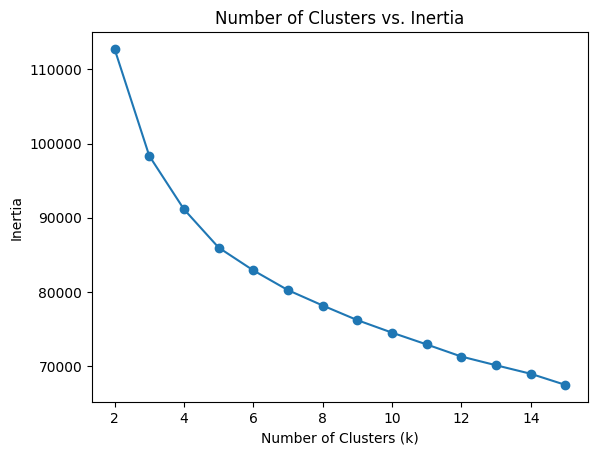

In [20]:
## Plot the Inertia Plot
# Turn the List into a Series of Plotting
inertia_series = pd.Series(inertia_values, index = range(2, 16))

# Plot the Data
inertia_series.plot(marker= 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')
plt.show()

So, looking at this we need to find the Elbow of this Inertia Plot.

The Inertia drops significantly at K=5. So, we choose k=5 for our KMeans Clustering.

### **Plot the Intertia Values and Find the Elbow**

Identify the Elbow of the Inertia Plot and Fit a K-Means Model using that value of k.

In [21]:
kmeans5 = KMeans(n_clusters= 5, n_init= 10, random_state= 42)
kmeans5.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

### **Check the Number of Customers in each Cluster**

In [22]:
from collections import Counter

Counter(kmeans5.labels_)

Counter({np.int32(3): 2343,
         np.int32(2): 2336,
         np.int32(4): 2329,
         np.int32(1): 2305,
         np.int32(0): 687})

### **Create a Heat Map of the Cluster Centers and Interprete the Cluster**


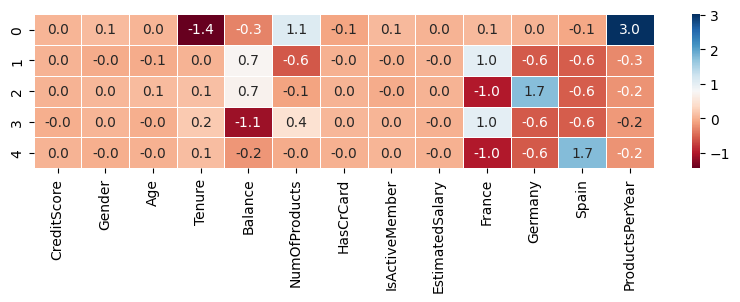

In [23]:
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns = df_scaled.columns)

plt.figure(figsize = (10, 2))
sns.heatmap(cluster_centers5, annot = True, cmap="RdBu", fmt=".1f", linewidths= 0.5);

* 0: Many Products in a Short Time
* 1: French Customers with Few Products and High Balance
* 2: German Customers with a High Balance
* 3:French Customers with More Products and Low Balance
* 4: Spanish Customers

## **Objective 3: Cluster the Customers (Round 2)**

Our Third Objective is to Segment the Customers using K-Means Clustering using a different Subset of Fields and Compare the Model Results.

### **Updating the Model Dataset**

We will look at the Summary Stats by Country, and Exclude the Country Field as currently the clusters are dominated by the Country Field. Then we use the updated dataset for KMeans Clustering same way as the previous steps.

In [24]:
data_subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [25]:
data_geo = data_subset.copy()
data_geo.Gender = np.where(data_geo.Gender == 'Female', 1, 0)
data_geo.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10


In [26]:
data_geo.groupby('Geography').mean().round()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,650.0,0.0,39.0,5.0,62093.0,2.0,1.0,1.0,99899.0
Germany,651.0,0.0,40.0,5.0,119730.0,2.0,1.0,0.0,101113.0
Spain,651.0,0.0,39.0,5.0,61818.0,2.0,1.0,1.0,99441.0


In [27]:
data_geo[data_geo.Geography == 'France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [28]:
data_geo[data_geo.Geography == 'Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [29]:
data_geo[data_geo.Geography == 'Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

**Customers from French, Spain and Germany have pretty similar attributes except in Balance. German customoers have higher Balance than the other two countries.**

So, we will exclude the Country Field.

In [30]:
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,-0.016781


In [31]:
df_scaled_no_geo = df_scaled.drop(columns = ['France', 'Germany', 'Spain'])
df_scaled_no_geo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.016781


### **Now, fit the Clustering Model with the Updated Data**

In [32]:
# Import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to hold many Inertia and Silhouette Values
inertia_values = []
silhouette_scores = []

# Creat 2-15 clusters, and add the Intertia Scores and Silhouette Scores to the Lists

for k in range(2, 16):
  kmeans = KMeans(n_clusters = k, n_init= 10, random_state = 42) #changed from auto to 10
  kmeans.fit(df_scaled_no_geo)
  inertia_values.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_scaled_no_geo, kmeans.labels_, metric= 'euclidean', sample_size= None))

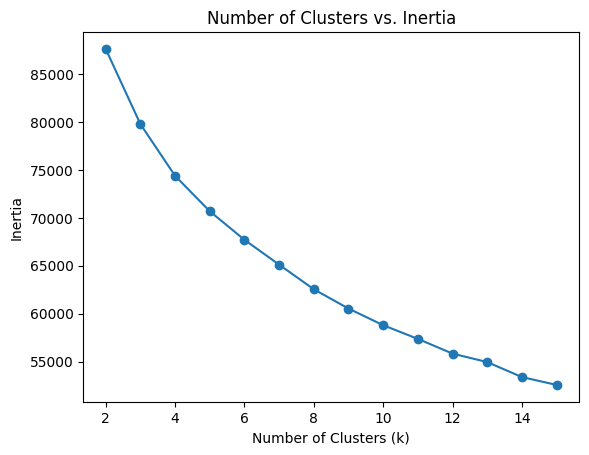

In [33]:
## Plot the Inertia Plot
# Turn the List into a Series of Plotting
inertia_series = pd.Series(inertia_values, index = range(2, 16))

# Plot the Data
inertia_series.plot(marker= 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')
plt.show()

The Inertia drops significantly at K=4. So, we choose k=5 for our KMeans Clustering.

In [34]:
kmeans4 = KMeans(n_clusters= 4, n_init= 10, random_state= 42)
kmeans4.fit(df_scaled_no_geo)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [35]:
Counter(kmeans4.labels_)

Counter({np.int32(1): 3223,
         np.int32(2): 2366,
         np.int32(0): 2276,
         np.int32(3): 2135})

### **Create the Heatmap again to Find the Cluster Centers**

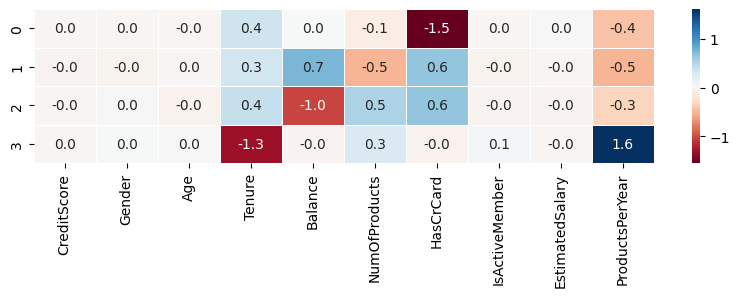

In [36]:
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns = df_scaled_no_geo.columns)

plt.figure(figsize = (10, 2))
sns.heatmap(cluster_centers4, annot = True, cmap="RdBu", fmt=".1f", linewidths= 0.5);

* 0: Customers who don't have a Credit Card, but with a relatively high Tenure.
* 1: High Balance with Few Products and Have Credit Card.
* 2: Low Balance, More Products and Have Credit Card.
* 3: Customers with Many Products in a very Short period of Time.

## **Objective 4: Explore the Clusters and Make Recommendations**

Our Final Objective is to further Explore Our K-Means Clusters by looking at their Churn Rate and Country Breakdown, then make Recommendations for how to Cater to each Customer Segment.

### **Let's create a DataFrame that combines the data set from the end of Objective 1, the "Exited" field, and the cluster labels.**

In [37]:
data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [38]:
data.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [39]:
kmeans4.labels_

array([2, 3, 2, ..., 0, 2, 1], shape=(10000,), dtype=int32)

**Let's merge those together:**

In [40]:
data_final = pd.concat([data_clean, data.Exited, pd.Series(kmeans4.labels_, name = 'Cluster')], axis = 1)
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited,Cluster
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500,1,2
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000,0,3
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375,1,2
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000,0,3
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500,0,1


### **View the Exited Percent for Each Cluster**

In [41]:
data_final.groupby('Cluster').mean().round(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0,651.20,0.46,38.92,6.03,78730.20,1.48,0.00,0.52,101285.72,0.50,0.24,0.26,0.29,0.21
1,649.38,0.43,39.04,5.98,123236.38,1.24,1.00,0.50,99856.40,0.42,0.38,0.20,0.25,0.23
2,650.24,0.46,38.52,6.17,11731.06,1.83,1.00,0.51,99487.18,0.62,0.07,0.31,0.34,0.16
3,651.88,0.47,39.19,1.18,75279.81,1.69,0.69,0.55,99837.12,0.49,0.27,0.24,1.32,0.21


**So, cluster 1 has the highest churn rate (23%) and cluster 2 has the lowest churn rate (16%)**

### **View the Geography Breakdown for Each Cluster**

For Cluster 2 there are many French Customers and very few German Customers.

### **Making Recommendations**

We have to make recommendations for how to Cater to each Customer Segments.

**These are the characteristics of the Clusters we found earlier:**

* 0: Customers who don't have a Credit Card.
* 1: High Balance with Few Products and Have Credit Card.
* 2: Low Balance, More Products and Have Credit Card.
* 3: Customers with Many Products in a very Short period of Time.

***Recommendations:***

*   **Clsuter 0:** Create an Entry-level Credit Card; Also, do some research on their Demographic Information.

*   **Cluster 1:** They have very high Balance, but likely to leave. So,  try to keep them by offering them financial seminars or advisors or, maybe suggest investment opportunities.

* **Cluster 2:** They are less likely to leave. We can reward them (French and Spanish Customers) for staying. We can introduce reward programs to encourage them to invest in more products.

* **Cluster 3:** They have many products in a very short time. Churn rate is also relatively high. Since, they like products we may offer them products with higher tenure.

